**Malaria Cell Images Dataset**

Building a Convolutional Neural Network to detect and deploy a human cell that contain malaria or not. 

In [0]:
import pandas as pd 
import numpy as np
import os 
import keras
import matplotlib.pyplot as plt 
import cv2 
import random 
import 



from keras.models import Sequential 
from keras.layers import Conv2D, Dense, Flatten, Dropout ,MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator 
from keras.callbacks import ReduceLROnPlateau

Using TensorFlow backend.


**Cell Image Dataset **

The Dataset contains two folders -- Infected and Uninfected 

In [0]:
print(os.listdir('cell_images'))

['Uninfected', 'Parasitized']


In [0]:
# Total Number of images 
uninfected_imgs = os.listdir('cell_images/Uninfected')
parasitized_imgs = os.listdir('cell_images/Parasitized')

print("Image Data Size : ")
print('Uninfected Imgs : ', len(uninfected_imgs))
print('Parasitized Imgs : ', len(parasitized_imgs))

Image Data Size : 
Uninfected Imgs :  13780
Parasitized Imgs :  13780


**Plotting Sample Images**

In [0]:
def visImageData(title, dataDir, noOfImgs, noOfRows, name):
  sample_imgs = random.sample(os.listdir(dataDir), noOfImgs)
  noOfCols = int(noOfImgs / noOfRows)
  
  f, ax = plt.subplots(noOfRows, noOfCols, figsize = (20, 10))
  for i in range(noOfImgs):
    img = cv2.imread(os.path.join(dataDir, sample_imgs[i]))
    ax[i//noOfCols, i%noOfCols].imshow(img)
    ax[i//noOfCols, i%noOfCols].axis('off')
  f.suptitle(title)
  plt.subplots_adjust(left = None, right = None, top = None, bottom = None, wspace =  0, hspace = 0.2)
  plt.show()
  plt.savefig(name)

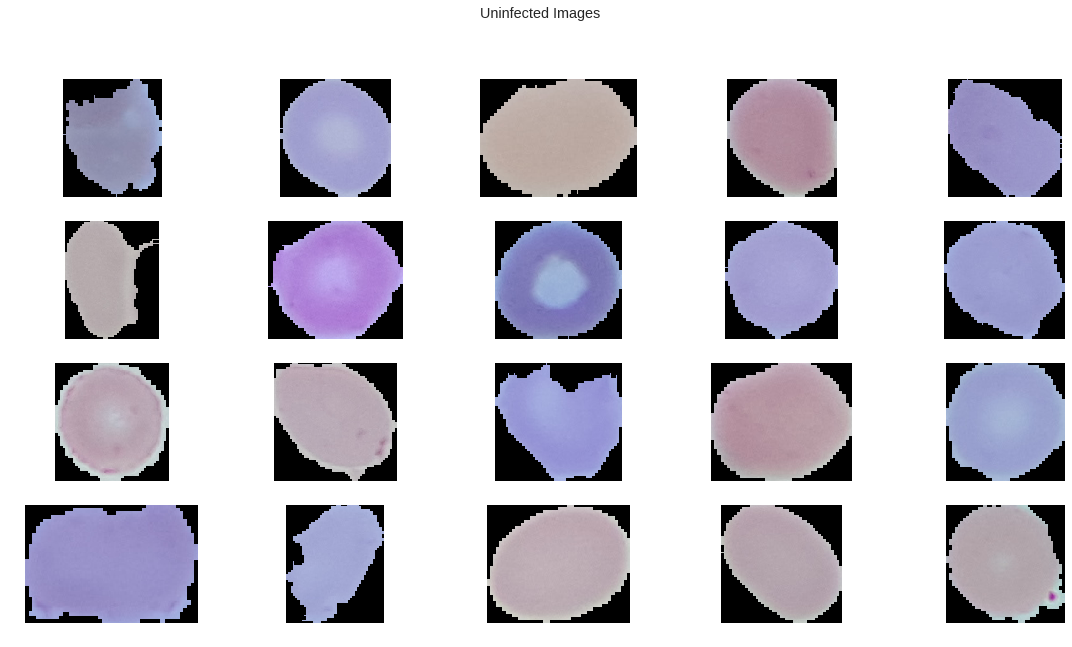

<Figure size 576x396 with 0 Axes>

In [0]:
# Plotting Uninfected Images
visImageData('Uninfected Images', 'cell_images/Uninfected', 20, 4, 'uninfectedImgs.png')

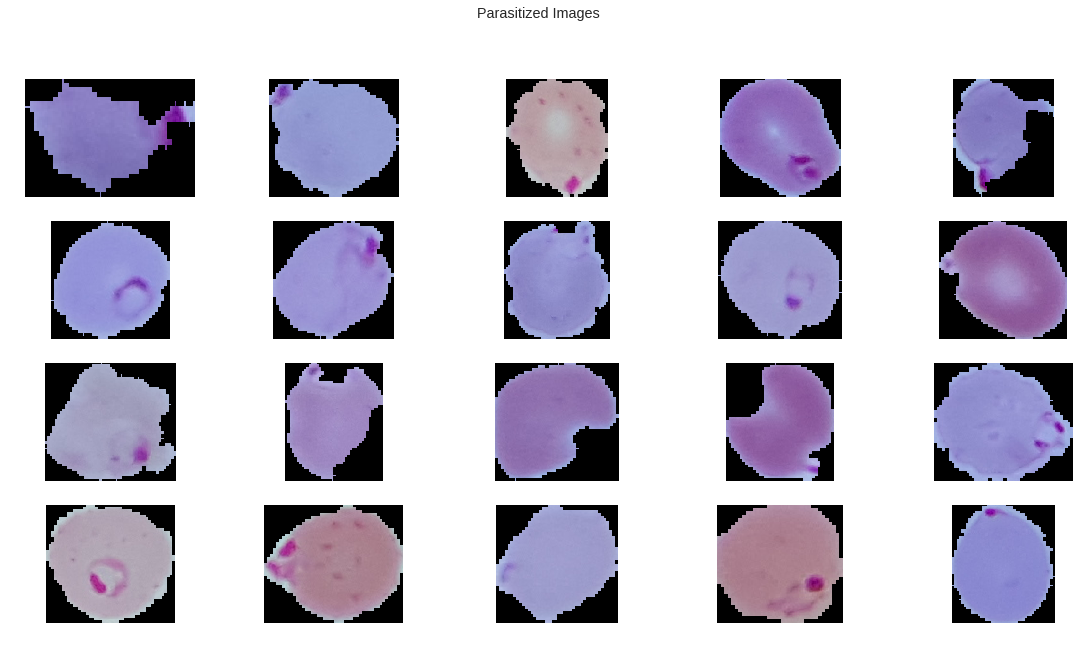

<Figure size 576x396 with 0 Axes>

In [0]:
# Plotting Parasitized Images 
visImageData('Parasitized Images', 'cell_images/Parasitized', 20, 4, 'parasitizedImgs.png')

**Splitting Image Dataset into Train-Val-Test Sets**

In [0]:
import skimage 
from skimage.transform import resize 
from keras.utils.np_utils import to_categorical 

def buildTrainValTestSet(imglbl, target_size, test_size):
  X = []
  y = []
  print("Building Train Validation Test Set ")
  
  for i, j in enumerate(imglbl):
    imgData = os.listdir(j)
    label = imglbl[j]
    
    print("Processing images from ",i)
    for im, jm in enumerate(imgData):
      img = cv2.imread(os.path.join(j, imgData[im]))
      
      img = skimage.transform.resize(img, target_size)
      img = np.asarray(img)
        
      X.append(img)
      y.append(label)
    print("Done")
    
  X = np.asarray(X)
  y = np.asarray(y)
  print("All Image processed, total length ", len(X))
  
  print("Train and Test Validation split")
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size, random_state = 42)
  X_train, Y_train, X_val, y_val = train_test_split(X_train, y_train, test_size, random_state = 42)
  num_classes = len(labels)
  y_train = np_utils.to_categorical(y_train,num_classes)
  y_test = np_utils.to_categorical(y_test, num_classes)
  y_val = np_utils.to_categorical(y_val, num_classes)  
  print("Done!")
  
  return X_train, X_test, X_val, y_train, y_test, y_val

In [0]:
imgpaths = ['cell_images/Uninfected', 'cell_images/Parasitized']
labels = (0, 1)
imglbl = dict(zip(imgpaths, labels))
target_size = (150, 150, 3)
test_size = 0.1

#for i, j in enumerate(os.listdir(imgpaths[0])):
#  print(i, j)
#  if i == 5:
#    break
X_train, X_test, X_val, y_train, y_test, y_val = buildTrainValTestSet(imglbl, target_size, test_size)

Building Train Validation Test Set 
Processing images from  0


/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


AttributeError: ignored

In [0]:
imgpaths = ['cell_images/Uninfected', 'cell_images/Parasitized']
labels = (0, 1)

img = dict(zip(imgpaths, labels))

for i in img:
  img_list = os.listdir(i)
  print(len(img_list))
  print(img[i])
  print(i)

13780
0
cell_images/Uninfected
13780
1
cell_images/Parasitized


**Model Training**

In [0]:
# Hyperparameters 
img_width, img_height = 150, 150

epochs = 10
batch_size = 32 

STEP_SIZE_TRAIN = 